<a href="https://colab.research.google.com/github/bingsen-wang/Electric-Machines/blob/main/ClarkeTransform_19phase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b>Clarke Transform: 19-phase to 2-phase</h1></b>

Dr. Bingsen Wang

11/24/2025
</center>

#Python Code

0
0
100
200
300
400
0


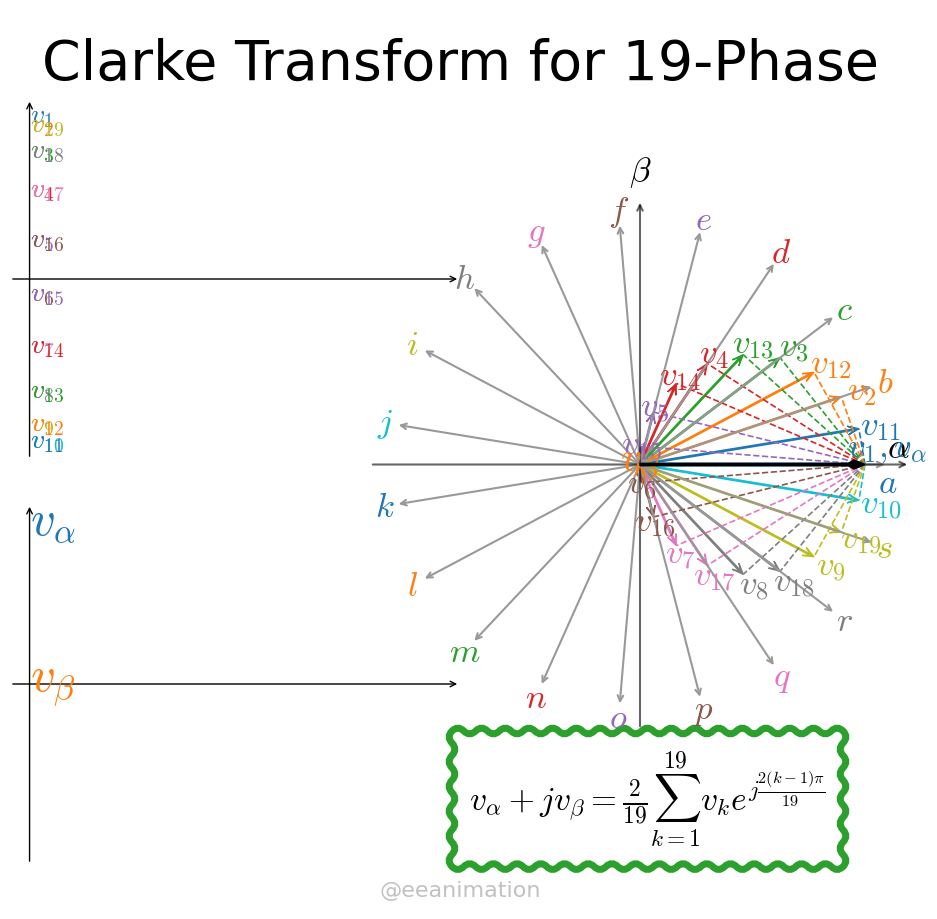

In [ ]:
from matplotlib import pyplot,animation,cm,patches
import numpy as np
pyplot.rcParams.update({"font.family":"sans-serif", "mathtext.fontset":"cm"})

abc2alphabeta = lambda v: [2/len(v)*sum([v[k]*np.exp(1j*np.pi*k*2/len(v)) for k in range(len(v))]).real,
                           2/len(v)*sum([v[k]*np.exp(1j*np.pi*k*2/len(v)) for k in range(len(v))]).imag]

Nf=480; Nph=19
wt=np.linspace(0,2*np.pi,Nf)
vabc=[np.cos(wt-np.pi*k*2/Nph) for k in range(Nph)]
valphabeta=abc2alphabeta(vabc)
vsv = valphabeta[0]+valphabeta[1]*1j

cl = list(cm.tab10.colors) #colors of lines
vec_vsv = patches.FancyArrow(0,0, dx=0,dy=0,width=.01,head_width=.04,head_length=.05,overhang=-.5,length_includes_head=True,color='k',zorder=4)
vec_alpha = patches.FancyArrow(0,0, dx=0,dy=0,width=.012,head_width=.04,head_length=.05,overhang=.6,length_includes_head=True,color=cl[0],zorder=3)
vec_vbeta = patches.FancyArrow(0,0, dx=0,dy=0,width=.012,head_width=.04,head_length=.05,overhang=.6,length_includes_head=True,color=cl[1],zorder=3)
vec_vabc = [patches.FancyArrow(0,0, dx=0,dy=0,width=.006,head_width=.04,head_length=.05,overhang=.6,length_includes_head=True,color=cl[k%10],zorder=2)for k in range(Nph)]
fig = pyplot.figure(figsize=([9,9]))
ax = fig.add_axes([0,0,1,1],xlim=[-1.2,1.2],ylim=[-1.2,1.25]);ax.axis('off')
ax1 = fig.add_axes([.4,.2,.6,.6],xlim=[-1.2,1.2],ylim=[-1.2,1.25],fc='none');ax1.axis('off')
ax2 = fig.add_axes([0,0.5,.5,.4],xlim=[-.05,1.1],ylim=[-1.1,1.1],fc='none');ax2.axis('off')
ax3 = fig.add_axes([0,0.05,.5,.4],xlim=[-.05,1.1],ylim=[-1.1,1.1],fc='none');ax3.axis('off')
xy0=(-.8,0)
ax.text(0,1.1,'Clarke Transform for 19-Phase',ha='center',va='center',size=40 )
ax.text(0.5, -.9, rf"$v_\alpha+jv_\beta=\frac{{2}}{{{Nph}}}\sum_{{k=1}}^{{{Nph}}}v_k e^{{j\frac{{2(k-1)\pi}}{{{Nph}}}}}$",
        ha="center", va="center", size=24,
        bbox=dict(boxstyle='roundtooth',pad=.7,facecolor='none',edgecolor=cl[2],lw=5))
for xy in [ax2,ax3]:
  xy.annotate("",(1.1,0),(-.05,0),arrowprops=dict(arrowstyle="->"))
  xy.annotate("",(0,1.1),(0,-1.1),arrowprops=dict(arrowstyle="->"))
[ax1.annotate("",(1.1*np.cos(k*2*np.pi/Nph),1.1*np.sin(k*2*np.pi/Nph)),(0,0),arrowprops=dict(arrowstyle="->",color='.6',lw=1.5)) for k in range(Nph)]
[ax1.annotate("",(1.2*np.cos(k*np.pi/2),1.2*np.sin(k*np.pi/2)),(-1.2*np.cos(k*np.pi/2),-1.2*np.sin(k*np.pi/2)),arrowprops=dict(arrowstyle="->",lw=1.5,alpha=.6)) for k in range(2)]
ax1.add_patch(vec_vsv)
ax1.add_patch(vec_vbeta);ax1.add_patch(vec_alpha)
[ax1.add_patch(vec_vabc[k])for k in range(len(vec_vabc))]
ax1.text(1.2,0,r'$\alpha$',size=25,ha='right',va='bottom')
ax1.text(0,1.25,r'$\beta$',size=25,ha='center',va='bottom')
ax1.text(1.1,0,r'$a$',size=25,ha='center',va='top',c=cl[0])
[ax1.text(1.15*np.cos((k+1)*np.pi*2/Nph),1.15*np.sin((k+1)*np.pi*2/Nph),
 ['$b$','$c$','$d$','$e$','$f$','$g$','$h$','$i$','$j$','$k$','$l$','$m$','$n$','$o$','$p$','$q$','$r$','$s$'][k],
          size=25,ha='center',va='center',c=cl[(1+k)%10])for k in range(Nph-1)]

lines =[ax2.plot([],[],lw=2,c=cl[k%10])[0] for k in range(Nph)]
lines += [ax3.plot([],[],lw=5,c=cl[k])[0] for k in range(2)]
lines += [ax1.plot([],[],'--',lw=1.2,c='k')[0]]
lines += [ax1.plot([],[],'--',lw=1.2,c=cl[k%10])[0]for k in range(Nph)]
lines += [ax1.plot([],[],'--',lw=1.2,c=cl[1])[0]]
txts=[ax2.text(0,0,f'$v_{{{k+1}}}$',size=20,color=cl[k%10],va='center') for k in range(Nph)]
txts+=[ax3.text(0,0,[r'$v_{\alpha}$',r'$v_{\beta}$'][k],size=35,color=cl[k],va='center') for k in range(2)]
txts+=[ax1.text(0,0,([r'$v_1,v_\alpha$']+[f'$v_{{{k+2}}}$' for k in range(Nph-1)])[k],size=25,color=cl[k%10],va='center',ha='center') for k in range(Nph)]
txts[Nph+2].set_verticalalignment('bottom')
txts+=[ax1.text(0,0,[r'',r'$v_{\beta}$'][k],size=30,color=cl[k],va='center',ha='center') for k in range(2)]

def animate(i):
  if i%100==0: print(i)
  [lines[k].set_data(wt[:i+1]/(2*np.pi),vabc[k][:i+1]) for k in range(Nph)]
  [txts[k].set_position((wt[i]/(2*np.pi),vabc[k][i])) for k in range(Nph)]
  [lines[k+Nph].set_data(wt[:i+1]/(2*np.pi),valphabeta[k][:i+1]) for k in range(2)]
  [txts[k+Nph].set_position((wt[i]/(2*np.pi),valphabeta[k][i])) for k in range(2)]
  lines[Nph+2].set_data(valphabeta[0][:i+1],valphabeta[1][:i+1])
  [lines[Nph+3+k].set_data([valphabeta[0][i],vabc[k][i]*np.cos(k*np.pi*2/Nph)],
   [valphabeta[1][i],vabc[k][i]*np.sin(k*np.pi*2/Nph)])for k in range(Nph)]
  lines[2*Nph+3].set_data([valphabeta[0][i],0],[valphabeta[1][i]]*2)
  vec_vsv.set_data(dx=valphabeta[0][i],dy=valphabeta[1][i])
  vec_alpha.set_data(dx=valphabeta[0][i],dy=0)
  vec_vbeta.set_data(dx=0,dy=valphabeta[1][i])
  [vec_vabc[k].set_data(dx=vabc[k][i]*np.cos(k*np.pi*2/Nph),dy=vabc[k][i]*np.sin(k*np.pi*2/Nph))for k in range(len(vec_vabc))]
  [txts[k+Nph+2].set_position((1.1*vabc[k][i]*np.cos(k*2*np.pi/Nph),1.1*vabc[k][i]*np.sin(k*2*np.pi/Nph))) for k in range(Nph)]
  txts[Nph*2+3].set_position((0,1.1*valphabeta[1][i]))
  return
ax.text(np.average(ax.get_xlim()),ax.get_ylim()[0]*.99+ax.get_ylim()[1]*.01,r'@eeanimation',size=16,c='.2',alpha=.3,ha='center',va='bottom')
anim = animation.FuncAnimation(fig, animate, frames=Nf, interval=20)
anim.save("clarkeTransform19phase.mp4",writer=animation.FFMpegWriter(fps=60),dpi=200)